In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [6]:
df = pd.DataFrame(load_breast_cancer().data,
                  columns=load_breast_cancer().feature_names)
df['target'] = load_breast_cancer().target

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# UCI 머신 러닝 저장소에서 유방암 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.iloc[:,1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 독립변수 종속변수
y = df.iloc[:,1]
X = df.iloc[:,2:]
le.fit(y)
y = le.transform(y)

In [30]:
#변수들의 평균
x = X.apply(np.mean,axis=0)
np.std(x)
# 수치를 사용하는 알고리즘일 경우 Scaling 필요
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [31]:
## 주성분 분석 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)

In [33]:
## train_test분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/home/kwlee/anaconda3/envs/deeplearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9385964912280702

In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression()
)

In [49]:
X = df.iloc[:,2:]
y = df.iloc[:,1]
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [50]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [51]:
pipe_lr.score(X_test,y_test)

0.956140350877193

In [52]:
## train, validation, test
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=.3)

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_,y_,test_size=.5)

In [54]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [55]:
pipe_lr.score(X_val,y_val)

0.9176470588235294

In [56]:
pipe_lr.score(X_test,y_test)

0.9883720930232558

In [57]:
from sklearn.model_selection import StratifiedKFold

In [77]:
kfold = StratifiedKFold(n_splits=10).split(X, y)

In [78]:
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X[train], y[train])
    score = pipe_lr.score(X[test], y[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
          np.bincount(y[train]), score))

폴드:  1, 클래스 분포: [322 190], 정확도: 0.965
폴드:  2, 클래스 분포: [322 190], 정확도: 0.895
폴드:  3, 클래스 분포: [321 191], 정확도: 0.965
폴드:  4, 클래스 분포: [321 191], 정확도: 0.947
폴드:  5, 클래스 분포: [321 191], 정확도: 0.947
폴드:  6, 클래스 분포: [321 191], 정확도: 0.947
폴드:  7, 클래스 분포: [321 191], 정확도: 0.930
폴드:  8, 클래스 분포: [321 191], 정확도: 0.982
폴드:  9, 클래스 분포: [321 191], 정확도: 0.982
폴드: 10, 클래스 분포: [322 191], 정확도: 0.982


In [79]:
print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV 정확도: 0.954 +/- 0.026


In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=pipe_lr,
                X=X_train,
                y=y_train,
                cv=10,)

array([1.        , 0.95      , 0.95      , 0.875     , 0.975     ,
       0.925     , 0.95      , 0.975     , 0.87179487, 1.        ])

In [87]:
X = df.iloc[:,2:].values
y = df.iloc[:,1]
y = LabelEncoder().fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
lr = LogisticRegression()

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator = lr,
                X=X_train,
               y=y_train,
               cv=5)

/home/kwlee/anaconda3/envs/deeplearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kwlee/anaconda3/envs/deeplearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

array([0.93406593, 0.93406593, 0.95604396, 0.92307692, 0.92307692])

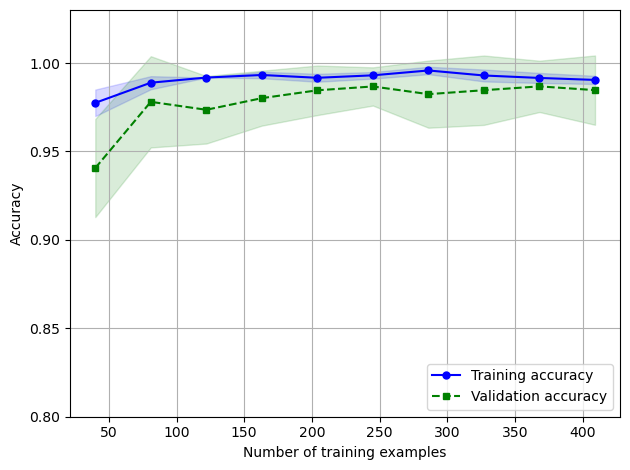

In [89]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [93]:
X_train.shape


(455, 30)

In [95]:
from sklearn.svm import SVC
svc = SVC()

In [105]:
svc.get_params()['kernel']

'rbf'

In [116]:
C = np.linspace(0.1,1,10)
K = ['rbf','linear']
scores = []
for c in C:
    for k in K:
        params = {'C':c,'kernel':k}
        svc = SVC(**params)
        svc.fit(X_train,y_train)
        score = svc.score(X_test,y_test)
        scores.append((c,k,score))
score_df = pd.DataFrame(zip(scores))

In [123]:
from sklearn.model_selection import GridSearchCV
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range, 
               'kernel': ['linear']},
              {'C': param_range, 
               'gamma': param_range, 
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator=svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)

In [124]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                1000.0],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                1000.0],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                    1000.0],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [131]:
gs.best_params_

{'C': 100.0, 'kernel': 'linear'}

In [132]:
svc = SVC(**gs.best_params_)

In [133]:
svc.fit(X_train,y_train)

SVC(C=100.0, kernel='linear')

In [134]:
svc.score(X_test,y_test)

0.9385964912280702

In [135]:
gs.best_estimator_.score(X_test,y_test)

0.9385964912280702

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
clf = gs.best_estimator_

In [140]:
clf.fit(X_train,y_train)

SVC(C=100.0, kernel='linear')

In [141]:
pred = clf.predict(X_test)

In [144]:
confusion_matrix(y_test,pred)

array([[72,  4],
       [ 3, 35]])

In [149]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [146]:
precision_score(y_test,pred)

0.8974358974358975

In [147]:
recall_score(y_test,pred)

0.9210526315789473

In [151]:
f1_score(y_test,pred)

0.9090909090909091

In [152]:
from sklearn.metrics import make_scorer

In [153]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

In [159]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [163]:
y_pred = np.zeros(y_imb.size)

In [164]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_imb)

0.8992443324937027

In [167]:
pred = clf.predict(X_imb)

In [168]:
accuracy_score(pred,y_imb)

0.9722921914357683

In [169]:
f1_score(pred,y_imb)

0.8735632183908046

In [170]:
gs.best_params_

{'C': 100.0, 'kernel': 'linear'}

In [171]:
svc = SVC(C=100,kernel='linear')

In [172]:
svc.fit(X_imb,y_imb)

SVC(C=100, kernel='linear')

In [173]:
pred = svc.predict(X_imb)

In [174]:
accuracy_score(pred,y_imb)

0.9874055415617129

In [175]:
f1_score(pred,y_imb)

0.9333333333333333

In [177]:
from sklearn.datasets import load_digits

In [178]:
X = load_digits().data
y = load_digits().target

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [181]:
X = X/255.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [183]:
dt_model = DecisionTreeClassifier()
svm_model = SVC(probability=True)
knn_model = KNeighborsClassifier()

In [184]:
dt_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [185]:
print(dt_model.score(X_test,y_test))
print(svm_model.score(X_test,y_test))
print(knn_model.score(X_test,y_test))

0.8583333333333333
0.9861111111111112
0.9888888888888889


In [188]:
## hard voting
print(dt_model.predict(X_test)[2])
print(svm_model.predict(X_test)[2])
print(knn_model.predict(X_test)[2])

2
2
2


In [190]:
new_pred = np.c_[dt_model.predict(X_test),svm_model.predict(X_test),knn_model.predict(X_test)]

In [211]:
accuracy_score(pd.DataFrame(new_pred).apply(xxx,1),y_test)

0.9027777777777778

In [205]:
[1,2,3,3][np.argmax(np.unique([1,1,1],return_counts=True)[1])]

1

In [206]:
def xxx(x):
    return x[np.argmax(np.unique(x,return_counts=True)[1])]

In [207]:
xxx(new_pred[3])

2

In [238]:
def find_vote(x):
    unique_result = np.unique(x,return_counts=True)
    idx = np.argmax(unique_result[1])
    result = unique_result[0][idx]
    return result

class Voting:
    def __init__(self,clf1,clf2,clf3):
        self.clf1 = clf1
        self.clf2 = clf2
        self.clf3 = clf3
        
    def fitting(self,x,y):
        self.clf1.fit(x,y)
        self.clf2.fit(x,y)
        self.clf3.fit(x,y)
    
    def hard_score(self,x,y):
        pred1 = self.clf1.predict(x) 
        pred2 = self.clf2.predict(x)
        pred3 = self.clf3.predict(x)
        result = np.c_[pred1,pred2,pred3]
        self.vote_pred = pd.DataFrame(result).apply(find_vote,1)
        
        return accuracy_score(y,self.vote_pred)
    
    def soft_score(self,x,y):
        pred1 = self.clf1.predict_proba(x)
        pred2 = self.clf2.predict_proba(x)
        pred3 = self.clf3.predict_proba(x)
        result = pred1+pred2+pred3
        pred = np.argmax(result,1)
        return accuracy_score(y,pred)
        


In [239]:
tree = DecisionTreeClassifier()
svm = SVC(probability=True)
knn = KNeighborsClassifier()

vote = Voting(tree,svm,knn)

In [240]:
vote.fitting(X_train,y_train)

In [241]:
vote.soft_score(X_test,y_test)

0.9888888888888889

In [242]:
vote.hard_score(X_test,y_test)

0.9861111111111112

In [277]:
class Stacking:
    def __init__(self,clf1,clf2,clf3,meta_clf):
        self.clf1 = clf1
        self.clf2 = clf2
        self.clf3 = clf3
        self.meta_clf = meta_clf
    def fitting(self,x,y):
        self.x = x
        self.y = y
        self.clf1.fit(self.x,self.y)
        self.clf2.fit(self.x,self.y)
        self.clf3.fit(self.x,self.y)
    def pred(self):
        pred1 = self.clf1.predict_proba(self.x)
        pred2 = self.clf2.predict_proba(self.x)
        pred3 = self.clf3.predict_proba(self.x)
        self.pred = np.c_[pred1,pred2,pred3]
    def fitting_meta(self):
        self.meta_clf.fit(self.pred,self.y)
    def score(self,x,y):
        self.pred()
        self.fitting_meta()
        pred1 = self.clf1.predict_proba(x)
        pred2 = self.clf2.predict_proba(x)
        pred3 = self.clf3.predict_proba(x)
        x = np.c_[pred1,pred2,pred3]
        pred = self.meta_clf.predict(x)
        return accuracy_score(pred,y)

In [264]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [278]:
svm = SVC(probability=True)
tree = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()

In [279]:
stack_model = Stacking(svm,tree,lr,rf)

In [280]:
stack_model.fitting(X_train,y_train)

/home/kwlee/anaconda3/envs/deeplearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [281]:
stack_model.score(X_test,y_test)

0.9166666666666666

In [270]:
from sklearn.datasets import load_wine
X = load_wine().data
y = load_wine().target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [271]:
svm = SVC(probability=True)
tree = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
stack = Stacking(tree,lr,rf,svm)

In [273]:
stack.fitting(X_train,y_train)

/home/kwlee/anaconda3/envs/deeplearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [274]:
stack.pred()

In [275]:
stack.fitting_meta()

In [276]:
stack.score(X_test,y_test)

0.9722222222222222

In [348]:
class Bagging:
    def __init__(self,x,y,n_trees):
        self.x = x
        self.y = y
        self.n_trees = n_trees
    def fitting(self):
        self.clfs = []
        for i in range(self.n_trees):
            tree = DecisionTreeClassifier()
            tree.fit(self.x,self.y)
            self.clfs.append(tree)
        
    def score(self,x,y):
        for clf in clfs:
            clf.predict(x)
        

In [349]:
rf = Bagging(X_train,y_train,50)

In [351]:
rf.clfs

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 

In [331]:
from sklearn.datasets import load_breast_cancer
X = load_breast_cancer().data
y = load_breast_cancer().target

In [332]:
rf = Bagging(X,y,30)

In [333]:
rf.fitting()

1.0

In [319]:
x = [1,2,3,4,2]
cnt = Counter(x)

In [321]:
cnt.most_common()[0][0]

2

In [334]:
from sklearn.ensemble import AdaBoostClassifier

In [335]:
ada = AdaBoostClassifier()

In [336]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [2]:
!pip install --upgrade scikit-learn

     ---------------------------------------- 8.4/8.4 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
